# A5 Reinforcement Learning

For this assignment, you will use the reinforcement learning algorithm, Q learning, with a neural network to approximate the Q function.  You will apply this to the game Tic-Tac-Toe and to the control of a simple robot arm.

Most of the code is provided. You are asked to make specific modifications and find parameter values that result in good performance on these tasks. The two tasks will probably require different parameter values.

Download necessary code from [A5.zip](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A5.zip).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Tic Tac Toe

In [2]:
import tictactoe

C:\Users\diloc\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
class Game:

    def __init__(self, environment, agents):

        self.env = environment
        self.agents = agents

    def train(self, parms):

        n_batches = parms['n_batches']
        n_trials_per_batch = parms['n_trials_per_batch']
        n_epochs = parms['n_epochs']
        method = parms['method']
        learning_rate = parms['learning_rate']

        ttt = self.env

        final_epsilon = 0.001
        epsilon_decay =  np.exp(np.log(final_epsilon) / (n_batches)) # to produce this final value
        epsilon = 1.0
        
        epsilon_trace = []
        outcomes = []

        for batch in range(n_batches):
            agents['X'].clear_samples()
            agents['O'].clear_samples()
            
            for trial in range(n_trials_per_batch):

                ttt.initialize()
                done = False

                while not done:

                    agent = agents[ttt.player]
                    obs = ttt.observe()
                    action = agent.epsilon_greedy(epsilon)

                    ttt.act(action)
                    r = ttt.reinforcement()
                    done = ttt.terminal_state()

                    # print(env)
                    # print(r)

                    agent.add_sample(obs, action, r, done)

                outcomes.append(r)

            # end n_trials_per_batch
            self.agents['X'].train(n_epochs, method, learning_rate)
            self.agents['O'].train(n_epochs, method, learning_rate)

            epsilon_trace.append(epsilon)
            epsilon *= epsilon_decay

            if len(outcomes) % ((n_batches * n_trials_per_batch) // 20) == 0:
                print(f'{len(outcomes)} games, {np.mean(outcomes):.2f} outcome mean')

        plt.subplot(3, 1, 1)
        n_per = 10
        n_bins = len(outcomes) // n_per
        outcomes_binned = np.array(outcomes).reshape(-1, n_per)
        avgs = outcomes_binned.mean(1)
        xs = np.linspace(n_per, n_per * n_bins, len(avgs))
        plt.plot(xs, avgs)
        plt.axhline(y=0, color='orange', ls='--')
        plt.ylabel('R')
        
        plt.subplot(3, 1, 2)
        plt.plot(xs, np.sum(outcomes_binned == -1, axis=1), 'r-', label='O Wins')
        plt.plot(xs, np.sum(outcomes_binned == 0, axis=1), 'b-', label='Draws')
        plt.plot(xs, np.sum(outcomes_binned == 1, axis=1), 'g-', label='X Wins')
        plt.legend(loc='center')
        plt.ylabel(f'Number of Games\nin Bins of {n_per:d}')
    
        plt.subplot(3, 1, 3)
        plt.plot(epsilon_trace)
        plt.ylabel('$\epsilon$')

        return outcomes, epsilon_trace


    def play_game(self):
        ttt = self.env
        agents = self.agents
        ttt.initialize()
        while True:
            agent = agents[env.player]
            obs = ttt.observe()
            action = agent.epsilon_greedy(epsilon=0.1)
            ttt.act(action)
            print(ttt)
            print(ttt.reinforcement)
            if ttt.terminal_state():
                break

    def play_game_show_Q(self):
        ttt = self.env
        agents = self.agents
        step = 0

        ttt.initialize()
        while True:
            agent = agents[ttt.player]
            obs = ttt.observe()
            actions = ttt.valid_actions()
            action = agent.epsilon_greedy(0.8 if step == 0 else 0.0)
            ttt.act(action)
            step += 1

            plt.subplot(5, 2, step)
            Qs = np.array([agent.use(np.hstack((obs, a))) for a in actions])
            board_image = np.array([np.nan] * 9)
            for Q, a in zip(Qs, actions):
                board_image[a] = Q
            board_image = board_image.reshape(3, 3)
            maxmag = np.nanmax(np.abs(board_image))
            plt.imshow(board_image, cmap='coolwarm', vmin=-maxmag, vmax=maxmag)
            plt.colorbar()
            obs = ttt.observe()
            i = -1
            for row in range(3):
                for col in range(3):
                    i += 1
                    if obs[i] == 1:
                        plt.text(col, row, 'X', ha='center',
                                 fontweight='bold', fontsize='large', color='black')
                    elif obs[i] == -1:
                        plt.text(col, row, 'O', ha='center',
                                 fontweight='bold', fontsize='large', color='black')
            plt.axis('off')
            if ttt.terminal_state():
                break

        plt.tight_layout()

In [6]:
ttt = tictactoe.TicTacToe()
agents = {'X': tictactoe.QnetAgent(ttt, [20, 20], 'max'), 'O': tictactoe.QnetAgent(ttt, [], 'min')}
game = Game(ttt, agents)

250 games, 0.42 outcome mean
500 games, 0.35 outcome mean
750 games, 0.35 outcome mean
1000 games, 0.38 outcome mean
1250 games, 0.40 outcome mean
1500 games, 0.43 outcome mean
1750 games, 0.46 outcome mean
2000 games, 0.49 outcome mean
2250 games, 0.52 outcome mean
2500 games, 0.55 outcome mean
2750 games, 0.59 outcome mean
3000 games, 0.62 outcome mean
3250 games, 0.65 outcome mean
3500 games, 0.67 outcome mean
3750 games, 0.69 outcome mean
4000 games, 0.71 outcome mean
4250 games, 0.72 outcome mean
4500 games, 0.74 outcome mean
4750 games, 0.75 outcome mean
5000 games, 0.76 outcome mean


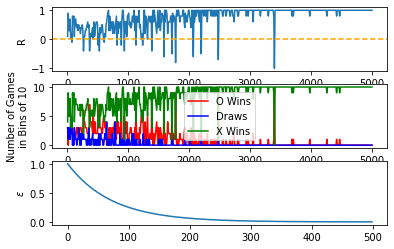

In [7]:
parms = {
    'n_batches': 500,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.2
}

outcomes = game.train(parms)

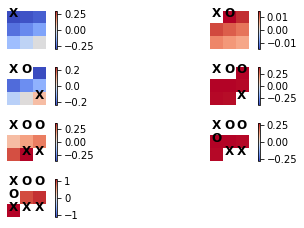

In [8]:
game.play_game_show_Q()

## Robot

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import robot

In [24]:
from IPython.display import display, clear_output
 
class Experiment:

    def __init__(self, environment, agent):

        self.env = environment
        self.agent = agent

    def train(self, parms):

        n_batches = parms['n_batches']
        n_steps_per_batch = parms['n_steps_per_batch']
        n_epochs = parms['n_epochs']
        method = parms['method']
        learning_rate = parms['learning_rate']

        env = self.env

        final_epsilon = 0.01
        epsilon_decay =  np.exp(np.log(final_epsilon) / (n_batches)) # to produce this final value
        epsilon = 1.0

        epsilon_trace = []
        outcomes = []

        for batch in range(n_batches):
            agent.clear_samples()
            env.initialize()

            for step in range(n_steps_per_batch):

                obs = self.env.observe()
                action = agent.epsilon_greedy(epsilon)

                env.act(action)
                r = env.reinforcement()

                done = step == n_steps_per_batch - 1
                agent.add_sample(obs, action, r, done)

            outcomes.append(r)

            self.agent.train(n_epochs, method, learning_rate)

            epsilon_trace.append(epsilon)
            epsilon *= epsilon_decay

            if len(outcomes) % (n_batches // 20) == 0:
                print(f'{len(outcomes)} batches, {np.mean(outcomes):.4f} outcome mean')

        plt.figure(1)
        plt.clf()
        plt.subplot(2, 1, 1)
        n_per = 10
        n_bins = len(outcomes) // n_per
        outcomes_binned = np.array(outcomes).reshape(-1, n_per)
        avgs = outcomes_binned.mean(1)
        xs = np.linspace(n_per, n_per * n_bins, len(avgs))
        plt.plot(xs, avgs)
        plt.axhline(y=0, color='orange', ls='--')
        plt.ylabel('R')

        plt.subplot(2, 1, 2)
        plt.plot(epsilon_trace)
        plt.ylabel('$\epsilon$')
        plt.pause(0.1)

        return outcomes, epsilon_trace

    def animate(self, n_steps):
        fig = plt.figure(figsize=(10, 10))
        robot = self.env
        robot.initialize()
        agent = self.agent
        points = np.zeros((n_steps, robot.n_links + 1, 2))
        actions = np.zeros((n_steps, robot.n_links))
        Q_values = np.zeros((n_steps))

        for i in range(n_steps):
            action = agent.epsilon_greedy(epsilon=0.0)
            Q = agent.use(np.hstack((robot.observe(), action)))
            self.env.act(action)
            points[i] = robot.points
            actions[i] = action
            Q_values[i] = Q

        Q_min, Q_max = np.min(Q_values), np.max(Q_values)
        print(Q_min, Q_max)
        for i in range(n_steps):
            fig.clf()
            plt.scatter(robot.goal[0], robot.goal[1], s=40, c='blue')
            action = actions[i]
            robot.set_points(points[i])
            robot.draw(alpha=(Q_values[i] - Q_min) / (Q_max - Q_min))
            # plt.pause(0.1)
            clear_output(wait=True)
            display(fig)
    
        clear_output(wait=True)  

In [25]:
robbie = robot.Robot()
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment(robbie, agent)

50 batches, -7.3385 outcome mean
100 batches, -7.6052 outcome mean
150 batches, -7.3811 outcome mean
200 batches, -6.9336 outcome mean
250 batches, -6.6007 outcome mean
300 batches, -6.2194 outcome mean
350 batches, -5.8595 outcome mean
400 batches, -5.5138 outcome mean
450 batches, -5.1898 outcome mean
500 batches, -4.9334 outcome mean
550 batches, -4.7153 outcome mean
600 batches, -4.4902 outcome mean
650 batches, -4.2923 outcome mean
700 batches, -4.1524 outcome mean
750 batches, -4.0463 outcome mean
800 batches, -3.9572 outcome mean
850 batches, -3.8651 outcome mean
900 batches, -3.7677 outcome mean
950 batches, -3.7074 outcome mean
1000 batches, -3.6573 outcome mean


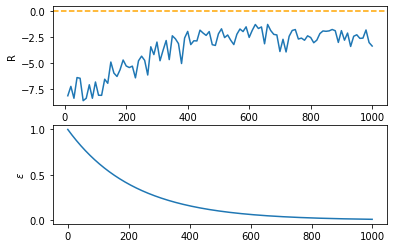

In [26]:
parms = {
    'n_batches': 1000,
    'n_steps_per_batch': 50,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.01
}

outcomes = experiment.train(parms)

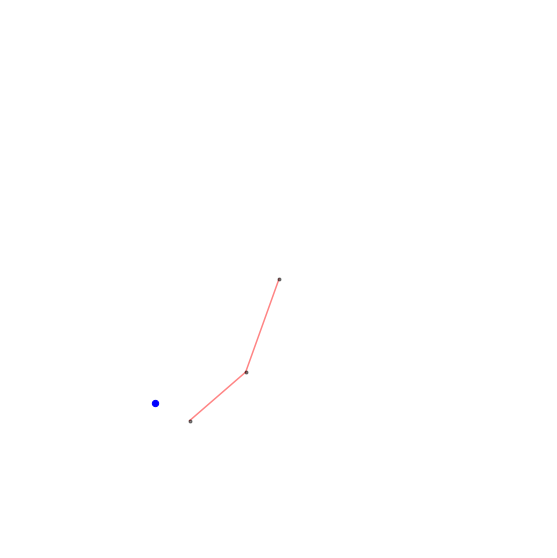

In [27]:
experiment.animate(100)

# Requirement 1

Define a new class, `QnetAgentRandom`, that extends `tictactoe.QnetAgent`.  This new class only needs to override the `epsilon_greedy` function to force a random action choice if the current player is 'O'.

Create a new instance of `Game` that uses the original `tictactoe.QnetAgent` for player X, and the new `tictactoe.QnetAgentRandom` for player O.  Try some variations of the parameters `parms` to try to get good learning behavior for player X.  

Discuss what you observe about the results of these experiments. Is it easier for player X to win against this random player?  Use `game.play_game_show_Q()` to show several games that you can use to verify that your `QnetAgentRandom` does pick random actions that are not the best actions as shown by the colors in the display.

In [9]:
class QnetAgentRandom(tictactoe.QnetAgent):
    
    def epsilon_greedy(self, epsilon):
        actions = self.env.valid_actions()
        
        if self.env.player == 'O':
            action = np.random.choice(actions)
        else:
            np.random.shuffle(actions)
            obs = self.env.observe()
            Qs = np.array([self.use(np.hstack((obs, a))) for a in actions])
            action = actions[np.argmax(Qs)]
        
        return action
        

In [64]:
ttt = tictactoe.TicTacToe()
agents = {'X': tictactoe.QnetAgent(ttt, [20, 20], 'max'), 'O': QnetAgentRandom(ttt, [], 'min')}

### Experiments varying learning_rate:

250 games, 0.33 outcome mean
500 games, 0.34 outcome mean
750 games, 0.42 outcome mean
1000 games, 0.42 outcome mean
1250 games, 0.45 outcome mean
1500 games, 0.48 outcome mean
1750 games, 0.50 outcome mean
2000 games, 0.51 outcome mean
2250 games, 0.53 outcome mean
2500 games, 0.55 outcome mean
2750 games, 0.56 outcome mean
3000 games, 0.58 outcome mean
3250 games, 0.58 outcome mean
3500 games, 0.60 outcome mean
3750 games, 0.62 outcome mean
4000 games, 0.63 outcome mean
4250 games, 0.63 outcome mean
4500 games, 0.63 outcome mean
4750 games, 0.64 outcome mean
5000 games, 0.64 outcome mean


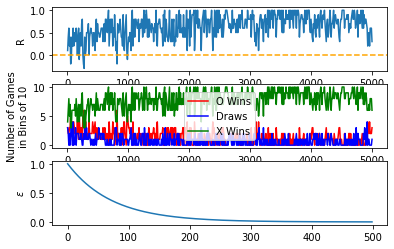

In [69]:
game = Game(ttt, agents)
parms = {
    'n_batches': 500,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.2
}

outcomes = game.train(parms)

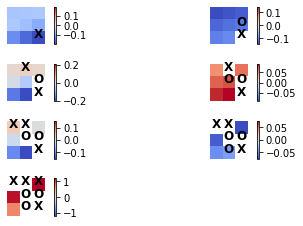

In [70]:
game.play_game_show_Q()

250 games, 0.34 outcome mean
500 games, 0.41 outcome mean
750 games, 0.40 outcome mean
1000 games, 0.43 outcome mean
1250 games, 0.47 outcome mean
1500 games, 0.50 outcome mean
1750 games, 0.52 outcome mean
2000 games, 0.54 outcome mean
2250 games, 0.57 outcome mean
2500 games, 0.58 outcome mean
2750 games, 0.58 outcome mean
3000 games, 0.59 outcome mean
3250 games, 0.60 outcome mean
3500 games, 0.60 outcome mean
3750 games, 0.60 outcome mean
4000 games, 0.61 outcome mean
4250 games, 0.60 outcome mean
4500 games, 0.61 outcome mean
4750 games, 0.61 outcome mean
5000 games, 0.62 outcome mean


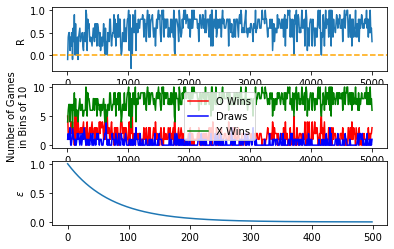

In [66]:
game = Game(ttt, agents)
parms = {
    'n_batches': 500,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.01
}

outcomes = game.train(parms)

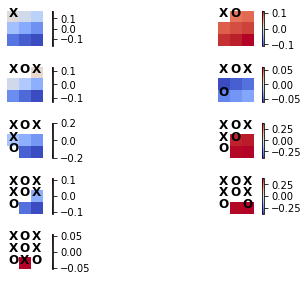

In [67]:
game.play_game_show_Q()

250 games, 0.30 outcome mean
500 games, 0.36 outcome mean
750 games, 0.39 outcome mean
1000 games, 0.43 outcome mean
1250 games, 0.45 outcome mean
1500 games, 0.50 outcome mean
1750 games, 0.51 outcome mean
2000 games, 0.50 outcome mean
2250 games, 0.51 outcome mean
2500 games, 0.51 outcome mean
2750 games, 0.51 outcome mean
3000 games, 0.50 outcome mean
3250 games, 0.50 outcome mean
3500 games, 0.51 outcome mean
3750 games, 0.51 outcome mean
4000 games, 0.51 outcome mean
4250 games, 0.51 outcome mean
4500 games, 0.51 outcome mean
4750 games, 0.52 outcome mean
5000 games, 0.52 outcome mean


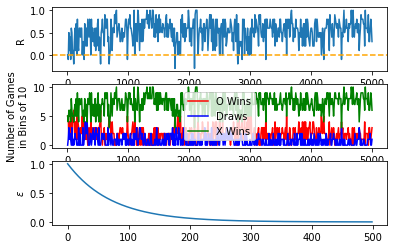

In [71]:
game = Game(ttt, agents)
parms = {
    'n_batches': 500,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.05
}

outcomes = game.train(parms)

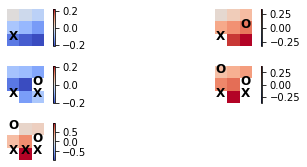

In [72]:
game.play_game_show_Q()

250 games, 0.32 outcome mean
500 games, 0.34 outcome mean
750 games, 0.39 outcome mean
1000 games, 0.45 outcome mean
1250 games, 0.47 outcome mean
1500 games, 0.49 outcome mean
1750 games, 0.51 outcome mean
2000 games, 0.54 outcome mean
2250 games, 0.56 outcome mean
2500 games, 0.57 outcome mean
2750 games, 0.59 outcome mean
3000 games, 0.60 outcome mean
3250 games, 0.60 outcome mean
3500 games, 0.61 outcome mean
3750 games, 0.62 outcome mean
4000 games, 0.62 outcome mean
4250 games, 0.62 outcome mean
4500 games, 0.62 outcome mean
4750 games, 0.63 outcome mean
5000 games, 0.63 outcome mean


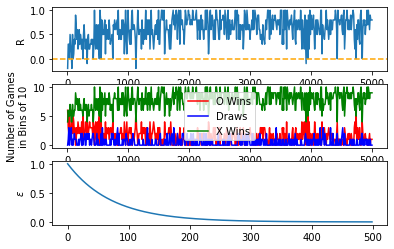

In [73]:
game = Game(ttt, agents)
parms = {
    'n_batches': 500,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.1
}

outcomes = game.train(parms)

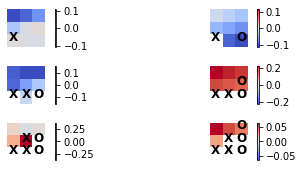

In [74]:
game.play_game_show_Q()

It can be observed that the average outcome for is comparatively higher for the game when the learning rate is 0.1. Thus, I will be using this value for other experiments.
Now, lets vary the methods to see if we get better results.

### Experiments varying optimizer method:

250 games, 0.33 outcome mean
500 games, 0.34 outcome mean
750 games, 0.35 outcome mean
1000 games, 0.35 outcome mean
1250 games, 0.33 outcome mean
1500 games, 0.34 outcome mean
1750 games, 0.33 outcome mean
2000 games, 0.32 outcome mean
2250 games, 0.33 outcome mean
2500 games, 0.32 outcome mean
2750 games, 0.33 outcome mean
3000 games, 0.33 outcome mean
3250 games, 0.34 outcome mean
3500 games, 0.33 outcome mean
3750 games, 0.33 outcome mean
4000 games, 0.34 outcome mean
4250 games, 0.34 outcome mean
4500 games, 0.34 outcome mean
4750 games, 0.34 outcome mean
5000 games, 0.34 outcome mean


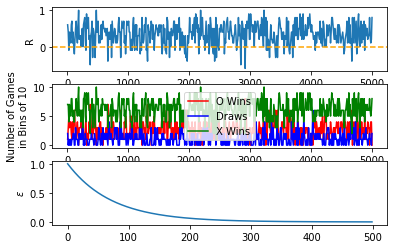

In [80]:
ttt = tictactoe.TicTacToe()
agents = {'X': tictactoe.QnetAgent(ttt, [20, 20], 'max'), 'O': QnetAgentRandom(ttt, [], 'min')}
game = Game(ttt, agents)
parms = {
    'n_batches': 500,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'adam',
    'learning_rate': 0.1
}
outcomes = game.train(parms)

250 games, 0.22 outcome mean
500 games, 0.30 outcome mean
750 games, 0.29 outcome mean
1000 games, 0.35 outcome mean
1250 games, 0.38 outcome mean
1500 games, 0.40 outcome mean
1750 games, 0.41 outcome mean
2000 games, 0.43 outcome mean
2250 games, 0.46 outcome mean
2500 games, 0.49 outcome mean
2750 games, 0.51 outcome mean
3000 games, 0.51 outcome mean
3250 games, 0.51 outcome mean
3500 games, 0.52 outcome mean
3750 games, 0.53 outcome mean
4000 games, 0.53 outcome mean
4250 games, 0.53 outcome mean
4500 games, 0.53 outcome mean
4750 games, 0.53 outcome mean
5000 games, 0.53 outcome mean


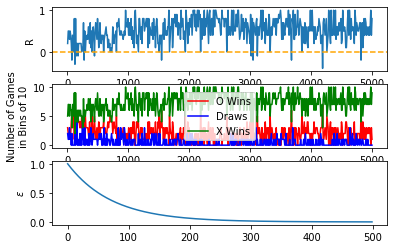

In [81]:
ttt = tictactoe.TicTacToe()
agents = {'X': tictactoe.QnetAgent(ttt, [20, 20], 'max'), 'O': QnetAgentRandom(ttt, [], 'min')}
game = Game(ttt, agents)
parms = {
    'n_batches': 500,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'sgd',
    'learning_rate': 0.1
}
outcomes = game.train(parms)

It can be observed that we got better results with comparatively higher mean outcomes when the optimizer method used is the SCG method. Thus, I will proceed with this to vary other parameters and see the corresponding results.

### Experiment varying number of batches:

500 games, 0.31 outcome mean
1000 games, 0.38 outcome mean
1500 games, 0.41 outcome mean
2000 games, 0.45 outcome mean
2500 games, 0.47 outcome mean
3000 games, 0.50 outcome mean
3500 games, 0.53 outcome mean
4000 games, 0.56 outcome mean
4500 games, 0.58 outcome mean
5000 games, 0.59 outcome mean
5500 games, 0.60 outcome mean
6000 games, 0.60 outcome mean
6500 games, 0.61 outcome mean
7000 games, 0.62 outcome mean
7500 games, 0.62 outcome mean
8000 games, 0.62 outcome mean
8500 games, 0.63 outcome mean
9000 games, 0.62 outcome mean
9500 games, 0.63 outcome mean
10000 games, 0.63 outcome mean


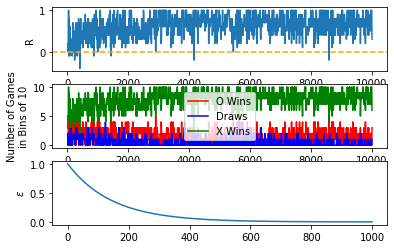

In [82]:
game = Game(ttt, agents)
parms = {
    'n_batches': 1000,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.1
}

outcomes = game.train(parms)

750 games, 0.27 outcome mean
1500 games, 0.35 outcome mean
2250 games, 0.41 outcome mean
3000 games, 0.46 outcome mean
3750 games, 0.49 outcome mean
4500 games, 0.50 outcome mean
5250 games, 0.52 outcome mean
6000 games, 0.53 outcome mean
6750 games, 0.55 outcome mean
7500 games, 0.56 outcome mean
8250 games, 0.57 outcome mean
9000 games, 0.58 outcome mean
9750 games, 0.58 outcome mean
10500 games, 0.59 outcome mean
11250 games, 0.60 outcome mean
12000 games, 0.59 outcome mean
12750 games, 0.59 outcome mean
13500 games, 0.61 outcome mean
14250 games, 0.62 outcome mean
15000 games, 0.64 outcome mean


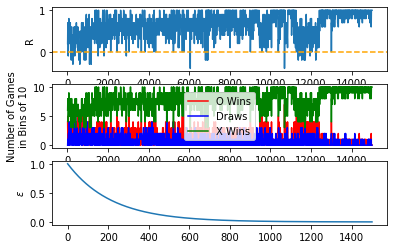

In [83]:
game = Game(ttt, agents)
parms = {
    'n_batches': 1500,
    'n_trials_per_batch': 10,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.1
}

outcomes = game.train(parms)

It can be observed that we get better results with higher mean outcomes when the number of batches is increased. But its not a significant imrovement on mean outcome considering the range in increase for number of batches. Also, looking that the graph, number of draws also significantly improves increasing the batch size. Hence, I will go ahead with 1500 batches for other experiments.

### Experiments varying number of trials per batch:

3750 games, 0.38 outcome mean
7500 games, 0.47 outcome mean
11250 games, 0.54 outcome mean
15000 games, 0.58 outcome mean
18750 games, 0.61 outcome mean
22500 games, 0.64 outcome mean
26250 games, 0.66 outcome mean
30000 games, 0.67 outcome mean
33750 games, 0.69 outcome mean
37500 games, 0.70 outcome mean
41250 games, 0.71 outcome mean
45000 games, 0.73 outcome mean
48750 games, 0.74 outcome mean
52500 games, 0.74 outcome mean
56250 games, 0.75 outcome mean
60000 games, 0.76 outcome mean
63750 games, 0.77 outcome mean
67500 games, 0.78 outcome mean
71250 games, 0.79 outcome mean
75000 games, 0.79 outcome mean


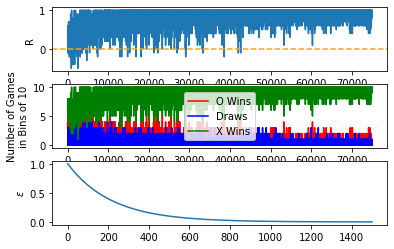

In [84]:
game = Game(ttt, agents)
parms = {
    'n_batches': 1500,
    'n_trials_per_batch': 50,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.1
}

outcomes = game.train(parms)

2250 games, 0.34 outcome mean
4500 games, 0.43 outcome mean
6750 games, 0.49 outcome mean
9000 games, 0.53 outcome mean
11250 games, 0.56 outcome mean
13500 games, 0.59 outcome mean
15750 games, 0.62 outcome mean
18000 games, 0.64 outcome mean
20250 games, 0.66 outcome mean
22500 games, 0.67 outcome mean
24750 games, 0.69 outcome mean
27000 games, 0.70 outcome mean
29250 games, 0.71 outcome mean
31500 games, 0.72 outcome mean
33750 games, 0.72 outcome mean
36000 games, 0.72 outcome mean
38250 games, 0.72 outcome mean
40500 games, 0.72 outcome mean
42750 games, 0.72 outcome mean
45000 games, 0.72 outcome mean


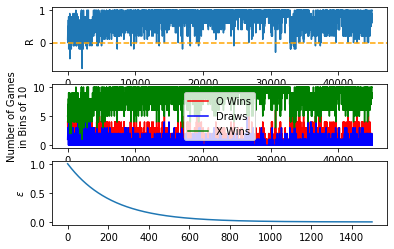

In [86]:
game = Game(ttt, agents)
parms = {
    'n_batches': 1500,
    'n_trials_per_batch': 30,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.1
}

outcomes = game.train(parms)

It can be observed that mean outcome correspondingly improves while increasing the number of trials per batch, as this increased the number of games played. Highest mean outcome of 0.79 was obtained when the trials per batch was 50, so I will be proceeding with this value for experiments on number of epochs.

### Experiments on varying number of epochs:

3750 games, 0.36 outcome mean
7500 games, 0.43 outcome mean
11250 games, 0.47 outcome mean
15000 games, 0.52 outcome mean
18750 games, 0.55 outcome mean
22500 games, 0.57 outcome mean
26250 games, 0.59 outcome mean
30000 games, 0.60 outcome mean
33750 games, 0.62 outcome mean
37500 games, 0.63 outcome mean
41250 games, 0.64 outcome mean
45000 games, 0.65 outcome mean
48750 games, 0.66 outcome mean
52500 games, 0.67 outcome mean
56250 games, 0.68 outcome mean
60000 games, 0.68 outcome mean
63750 games, 0.69 outcome mean
67500 games, 0.70 outcome mean
71250 games, 0.70 outcome mean
75000 games, 0.70 outcome mean


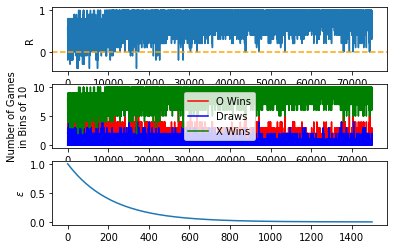

In [87]:
game = Game(ttt, agents)
parms = {
    'n_batches': 1500,
    'n_trials_per_batch': 50,
    'n_epochs': 6,
    'method': 'scg',
    'learning_rate': 0.1
}

outcomes = game.train(parms)

3750 games, 0.38 outcome mean
7500 games, 0.43 outcome mean
11250 games, 0.47 outcome mean
15000 games, 0.51 outcome mean
18750 games, 0.54 outcome mean
22500 games, 0.57 outcome mean
26250 games, 0.59 outcome mean
30000 games, 0.61 outcome mean
33750 games, 0.63 outcome mean
37500 games, 0.64 outcome mean
41250 games, 0.65 outcome mean
45000 games, 0.66 outcome mean
48750 games, 0.67 outcome mean
52500 games, 0.67 outcome mean
56250 games, 0.68 outcome mean
60000 games, 0.68 outcome mean
63750 games, 0.69 outcome mean
67500 games, 0.69 outcome mean
71250 games, 0.69 outcome mean
75000 games, 0.69 outcome mean


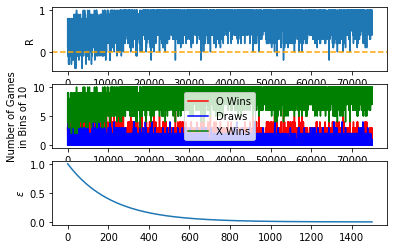

In [88]:
game = Game(ttt, agents)
parms = {
    'n_batches': 1500,
    'n_trials_per_batch': 50,
    'n_epochs': 10,
    'method': 'scg',
    'learning_rate': 0.1
}

outcomes = game.train(parms)

Finally, the better outcome was obtained when the number of epochs was 6.

### Discussion:

It can be observed that the experiments has significant improvement only when the learning_rate was 0.1. Also, significant improvements were observed only when the number of batches was increased along with the number of trials per batch. This increased the number of games played and finally gave us an output that had higher mean outcome. Along with that, this increased the number of wins and number of draws as well, compared to the number of losses, as observed from the graph.
Hence, learning rate, the optimizer method and number of times the game is played have a significant role in improving the performance of the agent.
Thus, it can be deduced that player X has highest chances of winning against a random player. Also, observing the plots, it can be seen that random agent is indeed picking random actions that are not the best actions, because X is winning in maximum of 4 steps which is the shortest game for TicTacToe.

# Requirement 2

Define a new class, `Robot2`, that extends `robot.Robot`.  In this new class, override the constructor `__init__` to allow the specification of the list of link lengths as an argument.

Define a new class, `Experiment2` that extends `Experiment`.  In this new class, override the `animate` function so that all positions of the robot are drawn with full intensity by calling `roboto.draw(alpha=1)`.

Run some experiments with a three link robot arm.  Try some variations in the link lengths.  You may have to explore changes in the parameters to make it work better.

Discuss what you observe about the results of these experiments. What parameter values allowed the reinforcement learning agent to better learn how to move the end of the arm close to the goal?

In [35]:
import itertools

class Robot2(robot.Robot):
    def __init__(self, link_lengths):
        self.n_links = len(link_lengths)
        self.angles = []
        self.link_lengths = np.array(link_lengths)
        self.state = np.zeros(self.n_links)  # joint angles
        self.points = [[10, 10] for _ in range(self.n_links + 1)]
        self.lim = sum(link_lengths)
        self.update_points()
        self.goal = None
        # single_joint_actions = [-0.5, -0.1, 0.0, 0.1, 0.5]
        single_joint_actions = [-0.1, -0.05, 0.0, 0.05, 0.1]
        self.valid_action_values =  np.array(list(itertools.product(single_joint_actions, repeat=self.n_links)))

        self.observation_size = self.n_links * 2
        self.action_size = self.n_links
        self.observation_means = [0] * 2 * self.n_links
        self.observation_stds = [0.7] * 2 * self.n_links
        self.action_means = [0.0] * self.n_links
        self.action_stds =  [0.08] * self.n_links
        self.Q_means = [-5]
        self.Q_stds = [1.6]
        
        self.goal = [5., 5.]
        

In [30]:
class Experiment2(Experiment):
    def animate(self, n_steps):
        fig = plt.figure(figsize=(10, 10))
        robot = self.env
        robot.initialize()
        agent = self.agent
        points = np.zeros((n_steps, robot.n_links + 1, 2))
        actions = np.zeros((n_steps, robot.n_links))
        Q_values = np.zeros((n_steps))

        for i in range(n_steps):
            action = agent.epsilon_greedy(epsilon=0.0)
            Q = agent.use(np.hstack((robot.observe(), action)))
            self.env.act(action)
            points[i] = robot.points
            actions[i] = action
            Q_values[i] = Q

        Q_min, Q_max = np.min(Q_values), np.max(Q_values)
        print(Q_min, Q_max)
        for i in range(n_steps):
            fig.clf()
            plt.scatter(robot.goal[0], robot.goal[1], s=40, c='blue')
            action = actions[i]
            robot.set_points(points[i])
            robot.draw(alpha=1)
            # plt.pause(0.1)
            clear_output(wait=True)
            display(fig)
    
        clear_output(wait=True)  

### Experiments for varying learning_rate:

50 batches, -8.4686 outcome mean
100 batches, -7.6391 outcome mean
150 batches, -7.5534 outcome mean
200 batches, -7.4603 outcome mean
250 batches, -6.8379 outcome mean
300 batches, -6.2971 outcome mean
350 batches, -5.8035 outcome mean
400 batches, -5.4400 outcome mean
450 batches, -5.1703 outcome mean
500 batches, -4.9237 outcome mean
550 batches, -4.6700 outcome mean
600 batches, -4.4917 outcome mean
650 batches, -4.4185 outcome mean
700 batches, -4.4581 outcome mean
750 batches, -4.3413 outcome mean
800 batches, -4.2822 outcome mean
850 batches, -4.1914 outcome mean
900 batches, -4.0987 outcome mean
950 batches, -4.0124 outcome mean
1000 batches, -3.9607 outcome mean


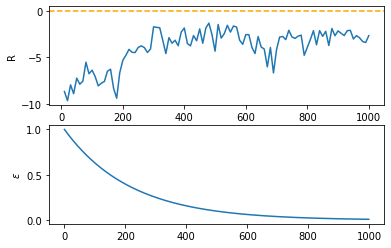

In [92]:
robbie = Robot2([4,3,1])
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment2(robbie, agent)
parms = {
    'n_batches': 1000,
    'n_steps_per_batch': 50,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.01
}

outcomes = experiment.train(parms)

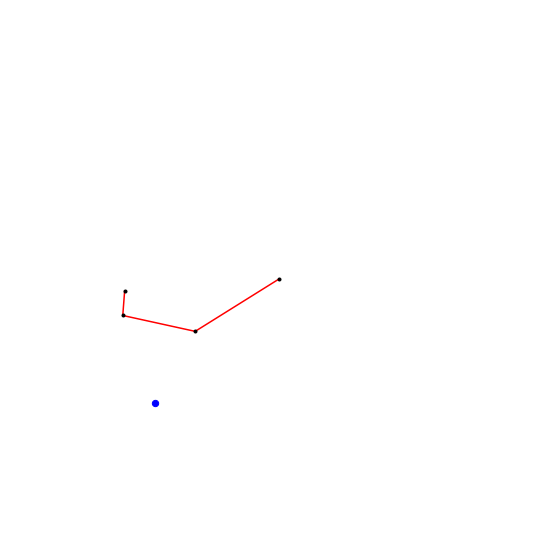

In [93]:
experiment.animate(100)

50 batches, -8.5576 outcome mean
100 batches, -8.6844 outcome mean
150 batches, -8.6264 outcome mean
200 batches, -8.3695 outcome mean
250 batches, -7.9593 outcome mean
300 batches, -7.6408 outcome mean
350 batches, -7.3650 outcome mean
400 batches, -6.9683 outcome mean
450 batches, -6.7904 outcome mean
500 batches, -6.6071 outcome mean
550 batches, -6.3451 outcome mean
600 batches, -6.1060 outcome mean
650 batches, -5.8988 outcome mean
700 batches, -5.7086 outcome mean
750 batches, -5.5380 outcome mean
800 batches, -5.3761 outcome mean
850 batches, -5.2029 outcome mean
900 batches, -5.1507 outcome mean
950 batches, -5.0620 outcome mean
1000 batches, -4.9501 outcome mean


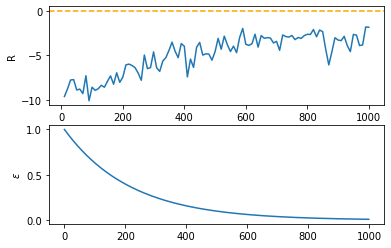

In [94]:
robbie = Robot2([4,3,1])
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment2(robbie, agent)
parms = {
    'n_batches': 1000,
    'n_steps_per_batch': 50,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.1
}

outcomes = experiment.train(parms)

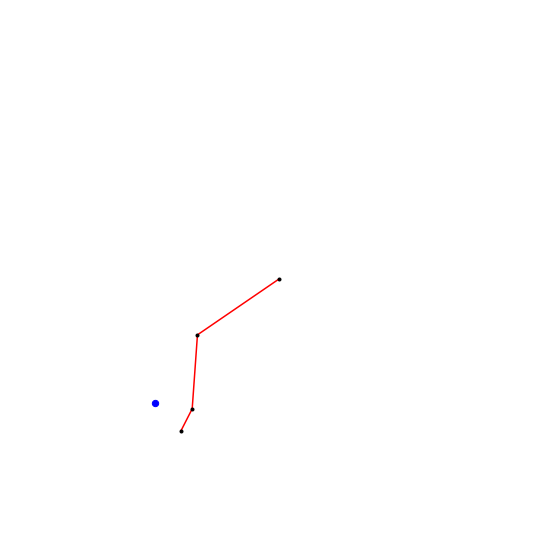

In [95]:
experiment.animate(100)

25 batches, -7.1815 outcome mean
50 batches, -7.4574 outcome mean
75 batches, -7.4847 outcome mean
100 batches, -7.2022 outcome mean
125 batches, -7.2552 outcome mean
150 batches, -7.1326 outcome mean
175 batches, -7.0415 outcome mean
200 batches, -6.9100 outcome mean
225 batches, -6.8337 outcome mean
250 batches, -6.7703 outcome mean
275 batches, -6.5786 outcome mean
300 batches, -6.4168 outcome mean
325 batches, -6.1908 outcome mean
350 batches, -6.0138 outcome mean
375 batches, -5.7835 outcome mean
400 batches, -5.6166 outcome mean
425 batches, -5.5345 outcome mean
450 batches, -5.4279 outcome mean
475 batches, -5.3356 outcome mean
500 batches, -5.1688 outcome mean


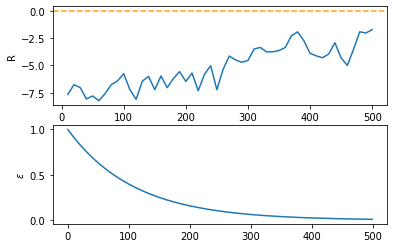

In [96]:
robbie = Robot2([4,3,1])
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment2(robbie, agent)
parms = {
    'n_batches': 500,
    'n_steps_per_batch': 50,
    'n_epochs': 3,
    'method': 'scg',
    'learning_rate': 0.2
}

outcomes = experiment.train(parms)

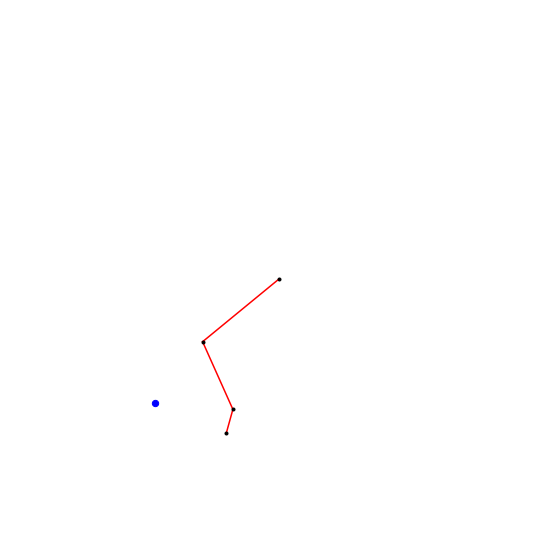

In [98]:
experiment.animate(100)

It can be observed that the average outcome for is comparatively higher for the robot hands when the learning rate is 0.2. Thus, I will be using this value for other experiments.
Now, lets vary the methods to see if we get better results.

### Experiments with varying optimizer methods

25 batches, -8.1909 outcome mean
50 batches, -8.0688 outcome mean
75 batches, -8.2106 outcome mean
100 batches, -7.8917 outcome mean
125 batches, -7.6546 outcome mean
150 batches, -7.7040 outcome mean
175 batches, -7.7137 outcome mean
200 batches, -7.6676 outcome mean
225 batches, -7.5423 outcome mean
250 batches, -7.5539 outcome mean
275 batches, -7.4857 outcome mean
300 batches, -7.5500 outcome mean
325 batches, -7.5697 outcome mean
350 batches, -7.6261 outcome mean
375 batches, -7.6101 outcome mean
400 batches, -7.5466 outcome mean
425 batches, -7.5535 outcome mean
450 batches, -7.5434 outcome mean
475 batches, -7.5559 outcome mean
500 batches, -7.5342 outcome mean


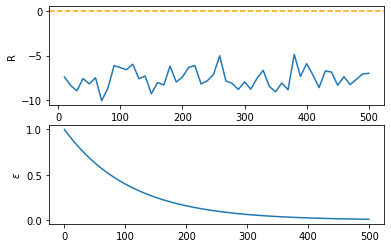

In [99]:
robbie = Robot2([4,3,1])
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment2(robbie, agent)
parms = {
    'n_batches': 500,
    'n_steps_per_batch': 50,
    'n_epochs': 3,
    'method': 'adam',
    'learning_rate': 0.2
}

outcomes = experiment.train(parms)

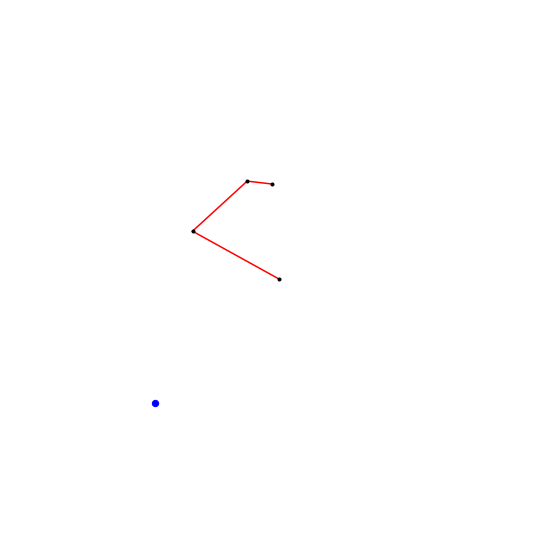

In [104]:
experiment.animate(100)

25 batches, -8.7829 outcome mean
50 batches, -8.7803 outcome mean
75 batches, -8.6412 outcome mean
100 batches, -8.3915 outcome mean
125 batches, -8.1787 outcome mean
150 batches, -7.8960 outcome mean
175 batches, -7.6908 outcome mean
200 batches, -7.7658 outcome mean
225 batches, -7.8248 outcome mean
250 batches, -7.9289 outcome mean
275 batches, -7.8681 outcome mean
300 batches, -7.9457 outcome mean
325 batches, -7.9517 outcome mean
350 batches, -7.9404 outcome mean
375 batches, -7.9662 outcome mean
400 batches, -7.9386 outcome mean
425 batches, -7.9818 outcome mean
450 batches, -7.9934 outcome mean
475 batches, -8.0854 outcome mean
500 batches, -8.0840 outcome mean


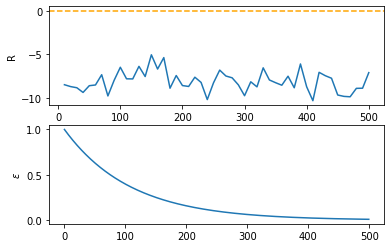

In [105]:
robbie = Robot2([4,3,1])
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment2(robbie, agent)
parms = {
    'n_batches': 500,
    'n_steps_per_batch': 50,
    'n_epochs': 3,
    'method': 'sgd',
    'learning_rate': 0.2
}

outcomes = experiment.train(parms)

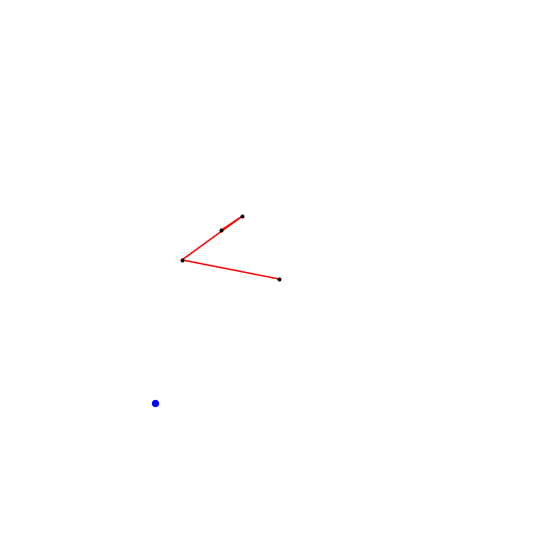

In [106]:
experiment.animate(100)

It can be observed that we got better results with comparatively higher mean outcomes when the optimizer method used is the SCG method. Thus, I will proceed with this to vary other parameters and see the corresponding results.

### Experiments with varying epochs:

25 batches, -7.8865 outcome mean
50 batches, -7.7723 outcome mean
75 batches, -7.7454 outcome mean
100 batches, -7.2676 outcome mean
125 batches, -6.8987 outcome mean
150 batches, -6.5740 outcome mean
175 batches, -6.2997 outcome mean
200 batches, -5.8846 outcome mean
225 batches, -5.5262 outcome mean
250 batches, -5.2857 outcome mean
275 batches, -5.1679 outcome mean
300 batches, -5.0858 outcome mean
325 batches, -4.8757 outcome mean
350 batches, -4.6547 outcome mean
375 batches, -4.5841 outcome mean
400 batches, -4.5821 outcome mean
425 batches, -4.6429 outcome mean
450 batches, -4.5364 outcome mean
475 batches, -4.4071 outcome mean
500 batches, -4.2699 outcome mean


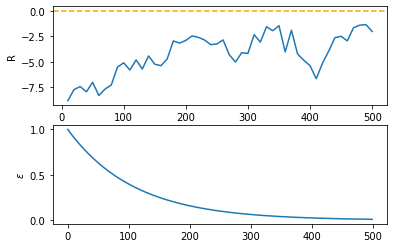

In [108]:
robbie = Robot2([4,3,1])
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment2(robbie, agent)
parms = {
    'n_batches': 500,
    'n_steps_per_batch': 50,
    'n_epochs': 6,
    'method': 'scg',
    'learning_rate': 0.2
}

outcomes = experiment.train(parms)

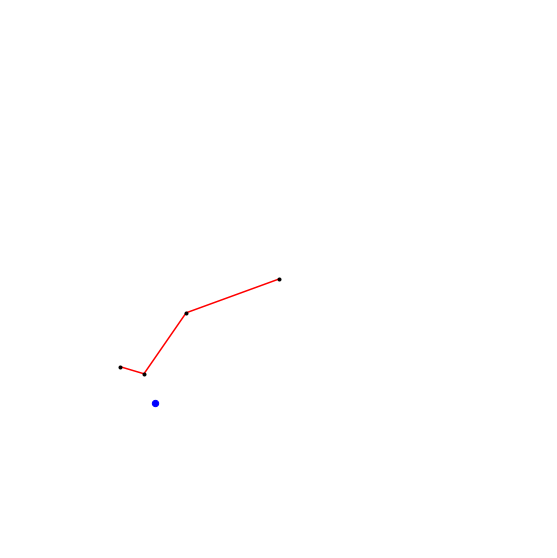

In [111]:
experiment.animate(100)

25 batches, -7.7043 outcome mean


C:\Users\diloc\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\diloc\Documents\colostate\ml\A5\neuralnetworksA4.py:323: RuntimeWarning: overflow encountered in square
  mean_sq_error = np.mean((T - Zs[-1]) ** 2)
C:\Users\diloc\Documents\colostate\ml\A5\neuralnetworksA4.py:382: RuntimeWarning: overflow encountered in matmul
  delta = delta @ self.Ws[layeri][1:, :].T * (1 - self.Zs[layeri] ** 2)
C:\Users\diloc\Documents\colostate\ml\A5\neuralnetworksA4.py:382: RuntimeWarning: invalid value encountered in multiply
  delta = delta @ self.Ws[layeri][1:, :].T * (1 - self.Zs[layeri] ** 2)


50 batches, -7.7892 outcome mean
75 batches, -7.7833 outcome mean
100 batches, -7.8869 outcome mean
125 batches, -8.0635 outcome mean
150 batches, -8.0093 outcome mean
175 batches, -7.8478 outcome mean
200 batches, -7.8012 outcome mean
225 batches, -7.8635 outcome mean
250 batches, -7.9950 outcome mean
275 batches, -7.9358 outcome mean
300 batches, -7.9577 outcome mean
325 batches, -7.9776 outcome mean
350 batches, -7.9294 outcome mean
375 batches, -7.9287 outcome mean
400 batches, -7.9600 outcome mean
425 batches, -7.9411 outcome mean
450 batches, -7.9717 outcome mean
475 batches, -7.9265 outcome mean
500 batches, -7.8954 outcome mean


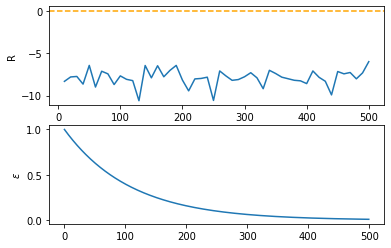

In [112]:
robbie = Robot2([4,3,1])
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment2(robbie, agent)
parms = {
    'n_batches': 500,
    'n_steps_per_batch': 50,
    'n_epochs': 10,
    'method': 'sgd',
    'learning_rate': 0.2
}

outcomes = experiment.train(parms)

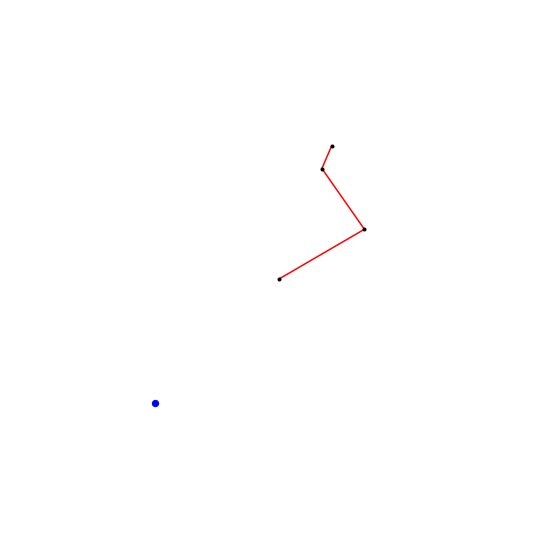

In [113]:
experiment.animate(100)

It can be seen that better outcome is obtained when the number of epochs was 6 and the mean outcomes is getting close to 0. Now I will proceed with varying link lengths for 1000 batches to see possible outcome.


### Experiment with different link lengths:

50 batches, -7.9871 outcome mean
100 batches, -8.1528 outcome mean
150 batches, -7.9799 outcome mean
200 batches, -7.9358 outcome mean
250 batches, -7.9730 outcome mean
300 batches, -8.1440 outcome mean
350 batches, -8.3135 outcome mean
400 batches, -8.2592 outcome mean
450 batches, -8.2816 outcome mean
500 batches, -8.2627 outcome mean
550 batches, -8.2201 outcome mean
600 batches, -8.2275 outcome mean
650 batches, -8.2467 outcome mean
700 batches, -8.2745 outcome mean
750 batches, -8.2403 outcome mean
800 batches, -8.2003 outcome mean
850 batches, -8.2445 outcome mean
900 batches, -8.1995 outcome mean
950 batches, -8.2077 outcome mean
1000 batches, -8.1694 outcome mean


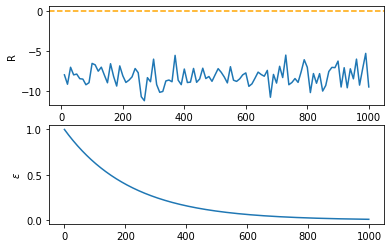

In [115]:
robbie = Robot2([3,3,3])
robbie.set_goal([5., 5.])

agent = robot.QnetAgent(robbie, [50, 20, 20])
experiment = Experiment2(robbie, agent)
parms = {
    'n_batches': 1000,
    'n_steps_per_batch': 50,
    'n_epochs': 6,
    'method': 'sgd',
    'learning_rate': 0.2
}

outcomes = experiment.train(parms)

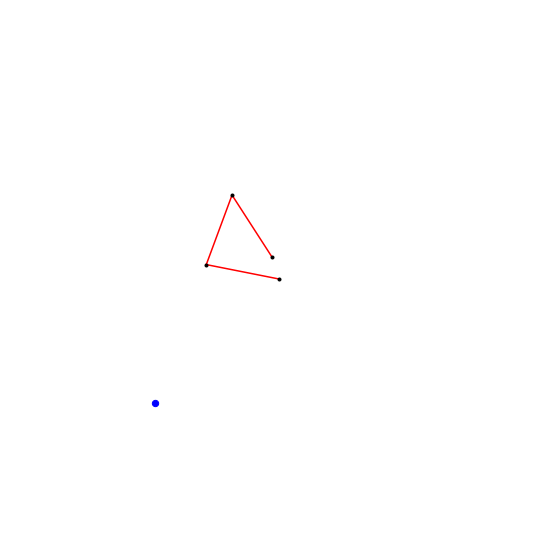

In [117]:
experiment.animate(100)

### Discussion:

Discuss what you observe about the results of these experiments. What parameter values allowed the reinforcement learning agent to better learn how to move the end of the arm close to the goal?

Similar to TicTacToe, here also it can be observed that the experiments has significant improvement only when the learning_rate was 0.2. Also, significant improvements were observed only when the number of batches was 1000 compared to 500. This increased the number of iterations tried and finally gave us an output that had higher mean outcome. 

Additionally, changing the link lengths to [3,3,3] from [4,3,1] didn't provide improved results. This shows that link lengths also have a impact in the performance of the learning agent. Also, looking that the animations, link lengths for [4,3,1] had a better chance of reaching the goal point, however, it frequently slipped past it. Ultimately, looking at the results, this link length had frequent chances of touching the goal point when the number of epochs was 6 and learning rate was 0.2.

Hence, learning rate, the optimizer method, number of epochs and number of batches the agent is tried have a significant role in improving the performance of the agent.

# Extra Credit

Create another class called `RobotExtra` that extends `robot.Robot` and another class names `ExperimentExtra` that extends `Experiment`.  In these new classes, make all of the modifications necessary to set the goal to random positions at the start of each batch.  Also modify the robot so that it observes the goal, meaning it becomes part of the input to the Qnet.  

This should result in agents that can move the end of the robot arm to be close to whatever goal is specified.  This will take many more batches, and experiments with verious parameter values.

# Check In

Check in your jupyter notebook in Canvas.

There is no grading script provided for this assignment.  All grading will be done by readying your notebook. 
50% of your grade will be based on your Tic Tac Toe experiments and discussions, and 50% on your Robot experiments and discussions.